<a href="https://colab.research.google.com/github/usshaa/Colabnb/blob/main/Gradient_Descent_%26_Optimizer_Strategies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Gradient Descent & Optimizer Strategies**

### **Learning Objectives**

* Understand how different gradient descent strategies work.
* Compare optimizer performance (SGD, Momentum, RMSProp, Adam, etc.)
* Visualize how optimizers affect training speed and convergence.
* Address common challenges: **vanishing** and **exploding** gradients.
* Learn how techniques like **early stopping** and **gradient clipping** help mitigate optimizer-related issues.

### **1. Setup & Dataset**

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [73]:
# Load a synthetic regression dataset
from sklearn.datasets import make_regression

In [74]:
X, y = make_regression(n_samples=1000, n_features=20, noise=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **2. Define a Simple Neural Network**

In [76]:
def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=20))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    return model

### **3. Try with Different Optimizers**

#### 🔸 A. Stochastic Gradient Descent (SGD)

In [77]:
model_sgd = build_model()
model_sgd.compile(optimizer=SGD(learning_rate=0.01), loss='mse', metrics=['mae'])
history_sgd = model_sgd.fit(X_train, y_train, validation_split=0.2, epochs=50, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 🔸 B. SGD with Momentum

In [78]:
model_momentum = build_model()
model_momentum.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='mse', metrics=['mae'])
history_momentum = model_momentum.fit(X_train, y_train, validation_split=0.2, epochs=50, verbose=0)

#### 🔸 C. RMSProp

In [79]:
model_rmsprop = build_model()
model_rmsprop.compile(optimizer=RMSprop(learning_rate=0.001), loss='mse', metrics=['mae'])
history_rmsprop = model_rmsprop.fit(X_train, y_train, validation_split=0.2, epochs=50, verbose=0)

#### 🔸 D. Adam

In [80]:
model_adam = build_model()
model_adam.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
history_adam = model_adam.fit(X_train, y_train, validation_split=0.2, epochs=50, verbose=0)

### **4. Visual Comparison of Loss Curves**

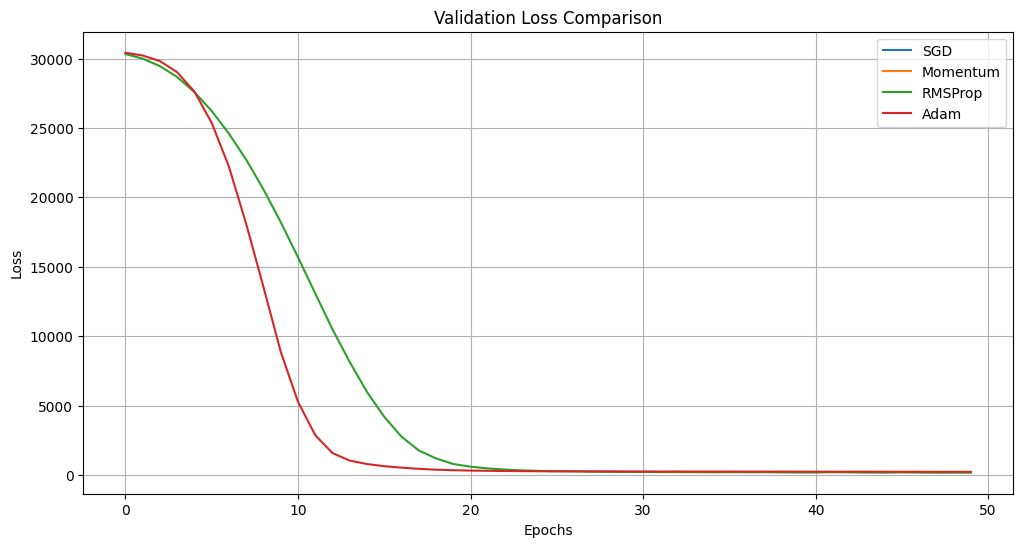

In [81]:
plt.figure(figsize=(12,6))

plt.plot(history_sgd.history['val_loss'], label='SGD')
plt.plot(history_momentum.history['val_loss'], label='Momentum')
plt.plot(history_rmsprop.history['val_loss'], label='RMSProp')
plt.plot(history_adam.history['val_loss'], label='Adam')

plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### **5. Explaining Vanishing & Exploding Gradient**

* Use deep network to show vanishing gradient


In [82]:
model_deep = Sequential()

In [83]:
for _ in range(10):  # More layers = more vanishing/exploding
    model_deep.add(Dense(128, activation='sigmoid', input_dim=20))
model_deep.add(Dense(1))

In [84]:
model_deep.compile(optimizer='sgd', loss='mse')
history_deep = model_deep.fit(X_train, y_train, validation_split=0.2, epochs=20, verbose=0)

# "Why sigmoid + deep layers lead to vanishing gradients?"

### **6. Fix: Use ReLU & He Initialization**

In [85]:
model_relu = Sequential()

In [86]:
for _ in range(10):
    model_relu.add(Dense(128, activation='relu', kernel_initializer='he_normal', input_dim=20))
model_relu.add(Dense(1))

In [87]:
model_relu.compile(optimizer='sgd', loss='mse')
history_relu = model_relu.fit(X_train, y_train, validation_split=0.2, epochs=20, verbose=0)

### **7. Early Stopping Implementation**

In [88]:
from tensorflow.keras.callbacks import EarlyStopping

In [89]:
model_es = build_model()
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [90]:
model_es.compile(optimizer='adam', loss='mse')
history_es = model_es.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stop], verbose=0)

### **8. Gradient Clipping**

In [91]:
from tensorflow.keras.optimizers import Adam

In [92]:
opt_clip = Adam(learning_rate=0.001, clipnorm=1.0)

In [93]:
model_clip = build_model()
model_clip.compile(optimizer=opt_clip, loss='mse')
history_clip = model_clip.fit(X_train, y_train, validation_split=0.2, epochs=50, verbose=0)

### Summary Table of Optimizers

| Optimizer | Pros                              | Cons                                |
| --------- | --------------------------------- | ----------------------------------- |
| SGD       | Simple, stable                    | Slow convergence                    |
| Momentum  | Faster convergence than SGD       | Sensitive to learning rate          |
| RMSProp   | Handles non-stationary objectives | Can overfit without tuning          |
| Adam      | Fast and adaptive                 | Might converge to suboptimal minima |